In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from math import sin, cos, pi

def plot_function(f, xmin, xmax, **kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts, [f(t) for t in ts], **kwargs)

In [2]:
def trajectory(theta, speed=20,height=0,dt=0.01,g=-9.81):
    vx = speed * cos(pi * theta / 180)
    vz = speed * sin(pi * theta / 180)
    t, x, z = 0, 0, height
    ts, xs, zs = [t], [x], [z]
    while z >= 0:
        t += dt
        vz += g * dt
        x += vx * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        zs.append(z)
    return ts, xs, zs

In [3]:
def plot_trajectories(*trajs, show_seconds=False):
    for traj in trajs:
        xs, zs = traj[1], traj[2]
        plt.plot(xs,zs)
        if show_seconds:
            second_indices=[]
            second = 0
            for i,t in enumerate(traj[0]):
                if t >= second:
                    second_indices.append(i)
                    second += 1
            plt.scatter([xs[i] for i in second_indices], [zs[i] for i in second_indices])
    xl = plt.xlim()
    plt.plot(plt.xlim(), [0,0],c='k')
    plt.xlim(*xl)

    width = 7
    coords_height = (plt.ylim()[1] - plt.ylim()[0])
    coords_width = (plt.xlim()[1] - plt.xlim()[0])
    plt.gcf().set_size_inches(width, width * coords_height/coords_width)


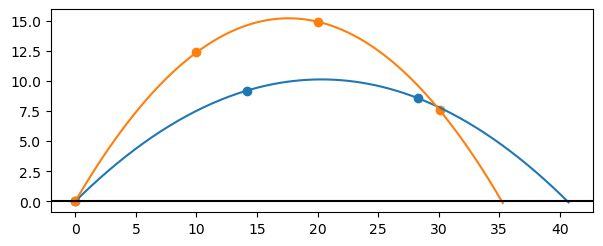

In [4]:
plot_trajectories(
    trajectory(45),
    trajectory(60), 
    show_seconds=True
)

In [5]:
def landing_position(traj):
    return traj[1][-1]

def hang_time(traj):
    return traj[0][-1]

def max_height(traj):
    return max(traj[2])

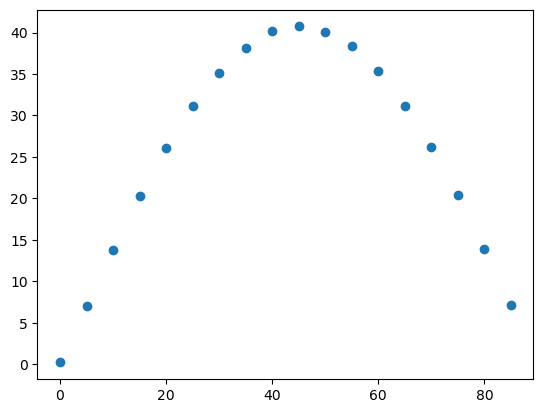

In [6]:
import matplotlib.pyplot as plt
angles = range(0, 90, 5)
landing_positions = [landing_position(trajectory(theta)) for theta in angles]
plt.scatter(angles, landing_positions)

In [7]:
landing_position(trajectory(0))

0.2

In [8]:
landing_position(trajectory(50))

40.10994684444007

In [9]:
landing_position(trajectory(130))

-40.10994684444007

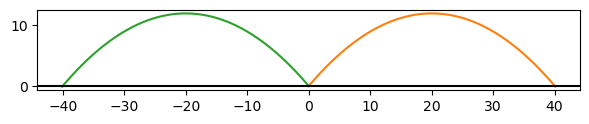

In [10]:
plot_trajectories(
    trajectory(0),
    trajectory(50), 
    trajectory(130)
)

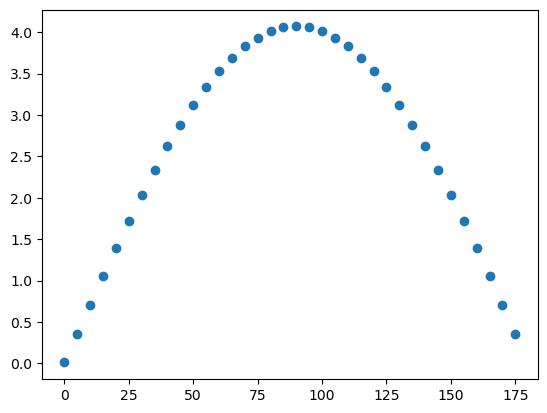

In [11]:
test_angles = range(0, 180, 5)
hang_times = [hang_time(trajectory(theta)) for theta in test_angles]
plt.scatter(test_angles, hang_times)

In [12]:
def plot_trajectory_metric(metric, thetas, **settings):
    plt.scatter(thetas, [metric(trajectory(theta, **settings)) for theta in thetas])

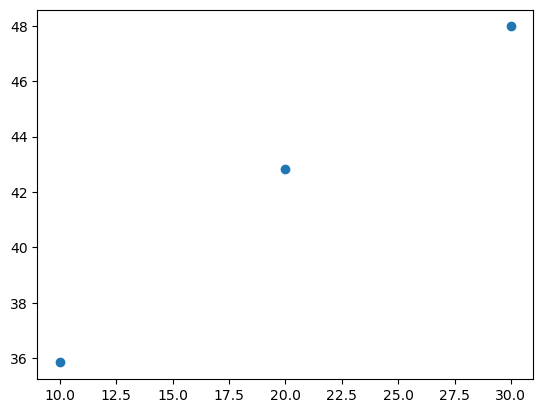

In [13]:
plot_trajectory_metric(landing_position, [10, 20, 30], height=10)

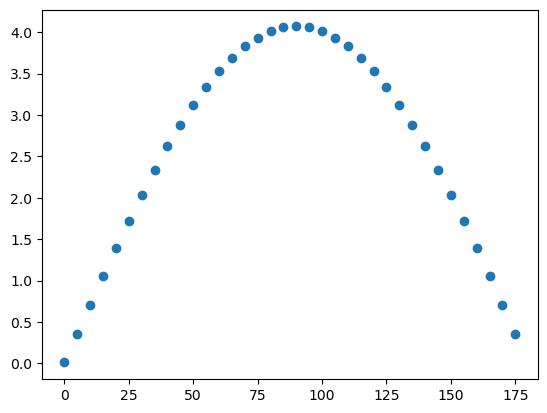

In [14]:
plot_trajectory_metric(hang_time, range(0, 180, 5))

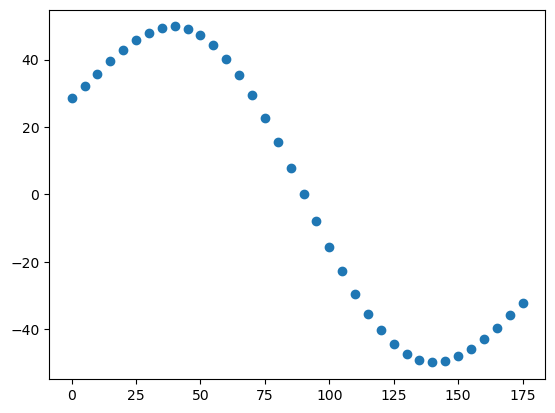

In [15]:
plot_trajectory_metric(landing_position, range(0, 180, 5), height=10)

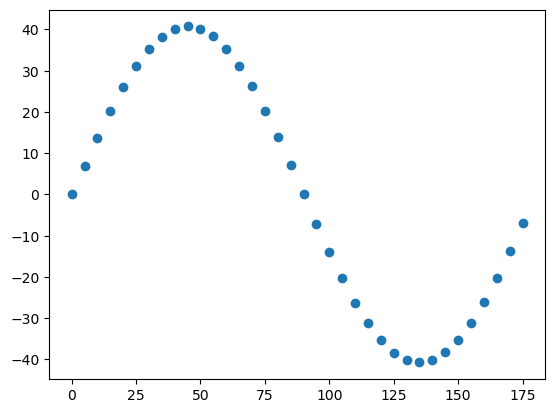

In [16]:
plot_trajectory_metric(landing_position, range(0, 180, 5))

# 2 Calculating the optimal range

## 2.1 Finding the projectile range as a function of the launch angle

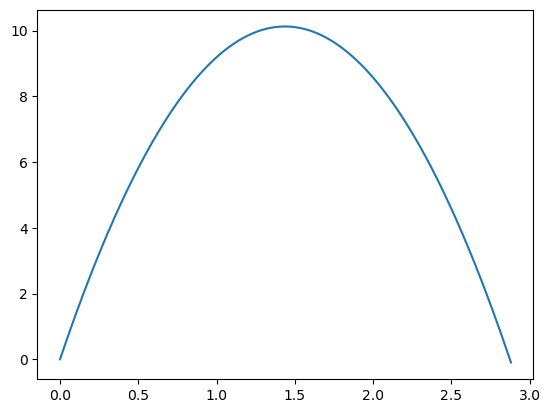

In [19]:
trj = trajectory(45)
ts, zs = trj[0], trj[2]
plt.plot(ts, zs)

In [20]:
def z(t):
    return 20*sin(45*pi/180)*t + (-9.81/2)*t**2

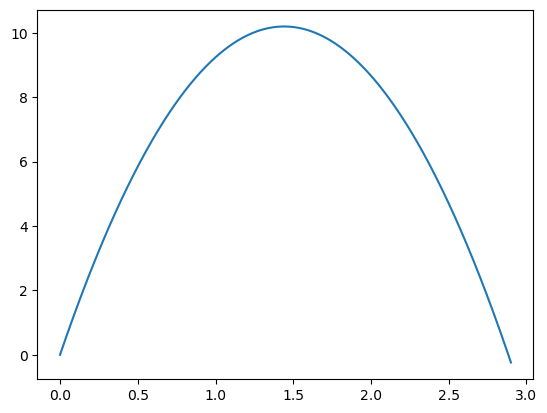

In [21]:
plot_function(z, 0,2.9)

In [22]:
def r(theta):
    return (-2*20*20/-9.81)*sin(theta*pi/180)*cos(theta*pi/180)

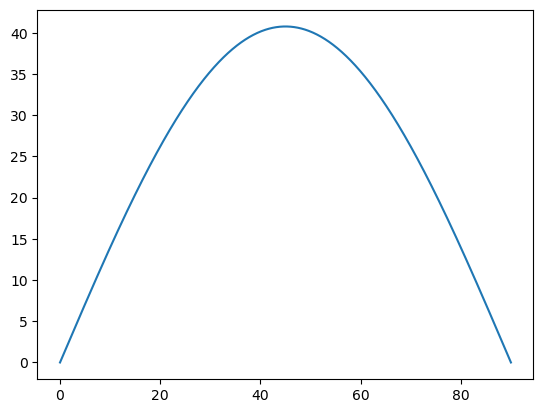

In [23]:
plot_function(r, 0, 90)

## Solving for the maximum range

In [25]:
r(45)

40.77471967380224

In [26]:
r(135)

-40.77471967380224

## 2.3 Identifying the maxima and minima

# 3 Enhancing our simulation

## 3.1 Adding another dimension 

In [30]:
def trajectory3d(theta, phi, speed=20, height=0, dt=0.01, g=-9.81):
    vx = speed * cos(pi*theta/180)*cos(pi*phi/180)
    vy = speed * cos(pi*theta/180)*sin(pi*phi/180)
    vz = speed * sin(pi*theta/180)
    t,x,y,z = 0, 0, 0, height
    ts, xs, ys, zs = [t], [x], [y], [z]
    while z >= 0:
        t += dt
        vz += g * dt
        x += vx * dt
        y += vy * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, xs, ys, zs

In [31]:
def plot_trajectory3d(traj):
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(7, 7)
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(traj[1],traj[2],traj[3])

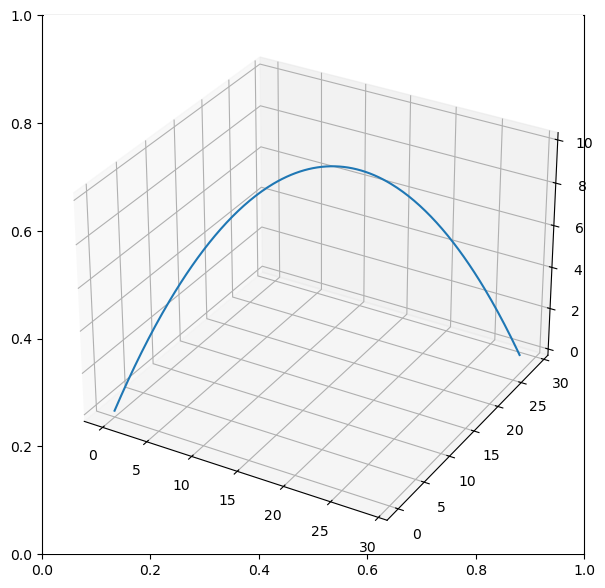

In [32]:
plot_trajectory3d(trajectory3d(45, 45))

## 3.2 Modeling terrain around the cannon

In [34]:
def flat_ground(x, y):
    return 0

In [35]:
def ridge(x, y):
    return (x**2 - 5*y**2) / 2500

In [36]:
def trajectory3d(theta, phi, speed=20, height=0, dt=0.01, g=-9.81, elevation=flat_ground):
    vx = speed * cos(pi*theta/180)*cos(pi*phi/180)
    vy = speed * cos(pi*theta/180)*sin(pi*phi/180)
    vz = speed * sin(pi*theta/180)
    t,x,y,z = 0, 0, 0, height
    ts, xs, ys, zs = [t], [x], [y], [z]
    while z >= elevation(x,y):
        t += dt
        vz += g * dt
        x += vx * dt
        y += vy * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, xs, ys, zs

In [37]:
def plot_trajectories_3d(*trajs,elevation=flat_ground,bounds=None,zbounds=None,shadows=False):
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(7,7)
    ax = fig.add_subplot(111, projection='3d')

    if not bounds:
        xmin = min([x for traj in trajs for x in traj[1]])
        xmax = max([x for traj in trajs for x in traj[1]])
        ymin = min([x for traj in trajs for x in traj[2]])
        ymax = max([x for traj in trajs for x in traj[2]])

        padding_x = 0.1 * (xmax-xmin)
        padding_y = 0.1 * (ymax-ymin)
        xmin -= padding_x
        xmax += padding_x
        ymin -= padding_y
        ymax += padding_y

    else:
        xmin, xmax, ymin, ymax = bounds

    plt.plot([xmin,xmax], [0,0], [0,0], c='k')
    plt.plot([0,0], [xmin,xmax], [0,0], c='k')

    g = np.vectorize(elevation)
    ground_x = np.linspace(xmin, xmax, 20)
    ground_y = np.linspace(ymin, ymax, 20)
    ground_x, ground_y = np.meshgrid(ground_x, ground_y)
    ground_z = g(ground_x, ground_y)
    ax.plot_surface(ground_x, ground_y, ground_z, cmap=cm.coolwarm, \
    alpha=0.5, linewidth=0, antialiased=True)

    for traj in trajs:
        ax.plot(traj[1], traj[2], traj[3])
        if shadows:
            ax.plot([traj[1][0], traj[1][-1]], [traj[2][0], traj[2][-1]], [0,0], c='gray', linestyle='dashed')
    if zbounds:
        ax.set_zlim(*zbound)

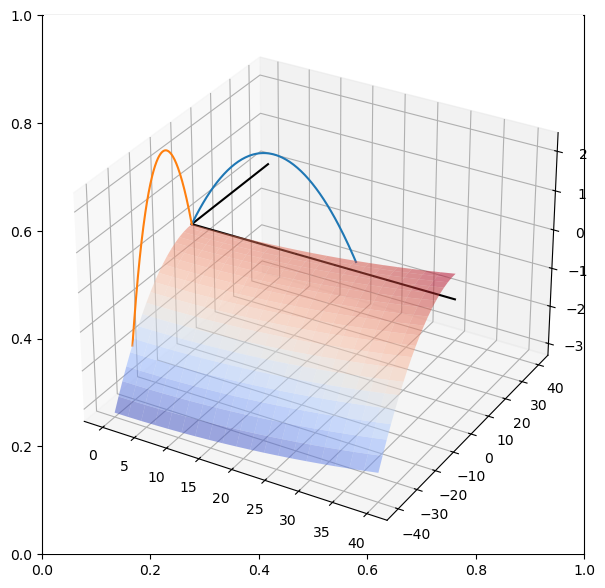

In [38]:
plot_trajectories_3d(
    trajectory3d(20,0,elevation=ridge),
    trajectory3d(20,270,elevation=ridge),
    bounds=[0, 40, -40, 0],
    elevation=ridge
)

## 3.3 Solving for the range of the projectile in 3D

In [78]:
from math import sqrt

B = 0.0004
C = 0.005
v = 20
g = -9.81

def velocity_components(v, theta, phi):
    vx = v * cos(theta*pi/180) * cos(phi*pi/180)
    vy = v * cos(theta*pi/180) * sin(phi*pi/180)
    vz = v * sin(theta*pi/180)
    return vx, vy, vz

def landing_distance(theta, phi):
    vx, vy, vz = velocity_components(v, theta, phi)
    v_xy = sqrt(vx**2 + vy**2)
    a = (g/2) - B * vx**2 + C * vy**2
    b = vz
    landing_time = -b/a
    landing_distance = v_xy * landing_time
    return landing_distance

In [90]:
def secant_slope(f, xmin, xmax):
    return (f(xmax) - f(xmin)) / (xmax - xmin)

def approx_derivative(f, x , dx=1e-6):
    return secant_slope(f, x-dx, x+dx)

def approx_gradient(f, x0, y0, dx=1e-6):
    partial_x = approx_derivative(lambda x: f(x, y0), x0, dx=dx)
    partial_y = approx_derivative(lambda y: f(x0, y), y0, dx=dx)
    return (partial_x, partial_y)

def landing_distance_gradient(theta, phi):
    return approx_gradient(landing_distance, theta, phi)

In [96]:
from vectors import length

def gradient_ascent(f, xstart, ystart, tolerance=1e-6):
    x = xstart
    y = ystart
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += grad[0]
        y += grad[1]
        grad = approx_gradient(f, x, y)
    return x, y

In [98]:
gradient_ascent(landing_distance, 36, 83)

(37.58114749426261, 89.9999161595094)

In [102]:
def gradient_ascent_points(f, xstart, ystart, tolerance=1e-6):
    x = xstart
    y = ystart
    xs, ys = [x], [y]
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += grad[0]
        y += grad[1]
        grad = approx_gradient(f, x, y)
        xs.append(x)
        ys.append(y)
    return xs, ys

In [104]:
gradient_ascent_points(landing_distance, 36, 83)

([36,
  36.121513398761245,
  36.234090862841036,
  36.3383994781831,
  36.43505383938642,
  36.52462050480822,
  36.607622128369954,
  36.684541093983434,
  36.755822954577674,
  36.82187939861482,
  36.883090985679665,
  36.9398097435134,
  36.99236137780149,
  37.04104741446004,
  37.086147057705055,
  37.12791895930387,
  37.16660277466371,
  37.202420662076904,
  37.23557861854121,
  37.266267655708056,
  37.29466500780517,
  37.320935087316606,
  37.34523049040068,
  37.36769286019941,
  37.38845365422467,
  37.40763498990405,
  37.42535022722589,
  37.44170466151848,
  37.456796088331494,
  37.47071535410665,
  37.483546878426594,
  37.49536906257699,
  37.50625476205743,
  37.51627168093266,
  37.52548272355124,
  37.53394636758047,
  37.54171691269635,
  37.548844846513106,
  37.555377093273115,
  37.56135725898419,
  37.56682584102965,
  37.571820494621875,
  37.576376235306974,
  37.58052552778262,
  37.5842986056423,
  37.58772354598229,
  37.59082642216835,
  37.5936314601

In [106]:
landing_distance(37.58114749426261, 89.9999161595094)

52.98310689353797